# Assignment 2
Pertemuan - 4 Linear & Logistic Regression

Lakukan proses Data Visualization, Data Preprocessing, dan Data Modeling lalu buat score accuracy

Data Attrbiute :
1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per 10.000
11. PTRATIO - pupil-teacher ratio by town
12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')

## Data Load

In [2]:
df = pd.read_csv('boston_housing.csv')
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


### Total Data

In [3]:
print(f'Total Data : {df.shape[0]}')
print(f'Total Column : {df.shape[1]}')

Total Data : 506
Total Column : 14


### Check Info Datasets

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


### Check Missing Value

In [5]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

### Check unique data

In [6]:
df.nunique()

crim       504
zn          26
indus       76
chas         2
nox         81
rm         446
age        356
dis        412
rad          9
tax         66
ptratio     46
b          357
lstat      455
medv       229
dtype: int64

### Describe data

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


## Visualization

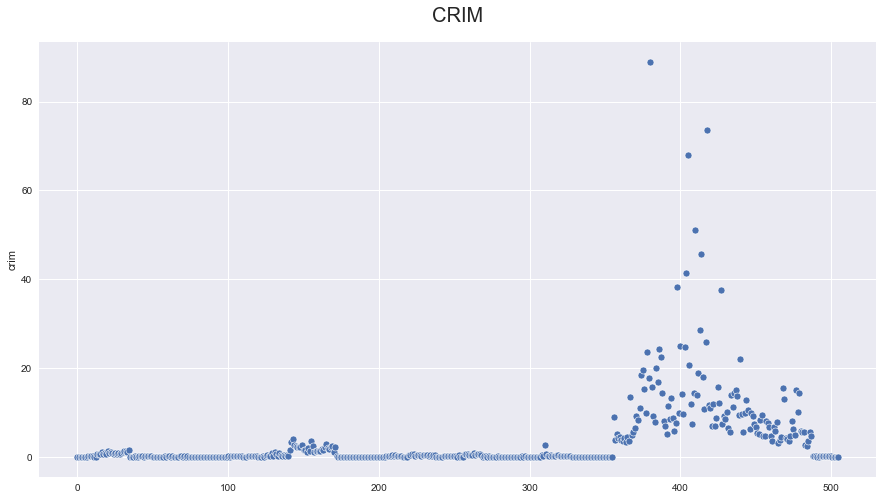

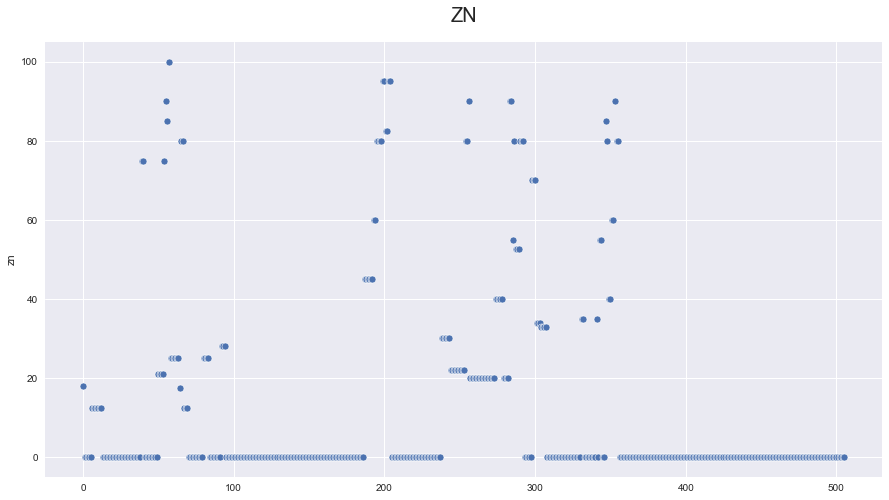

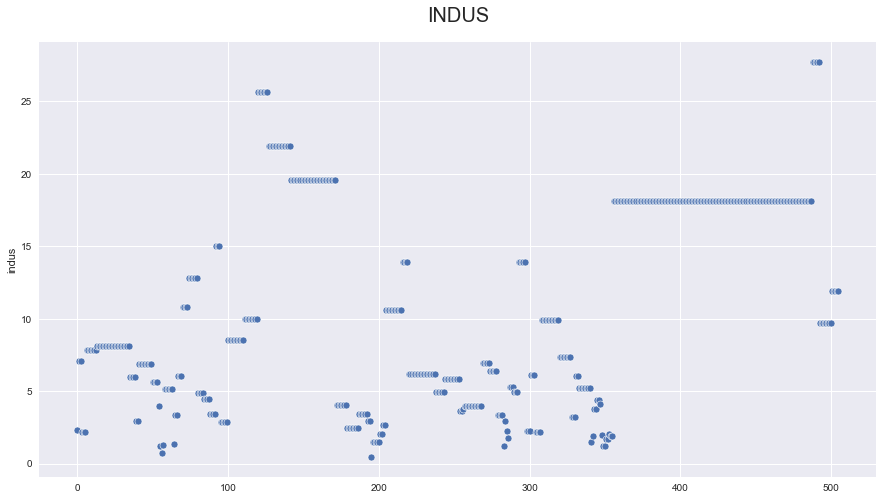

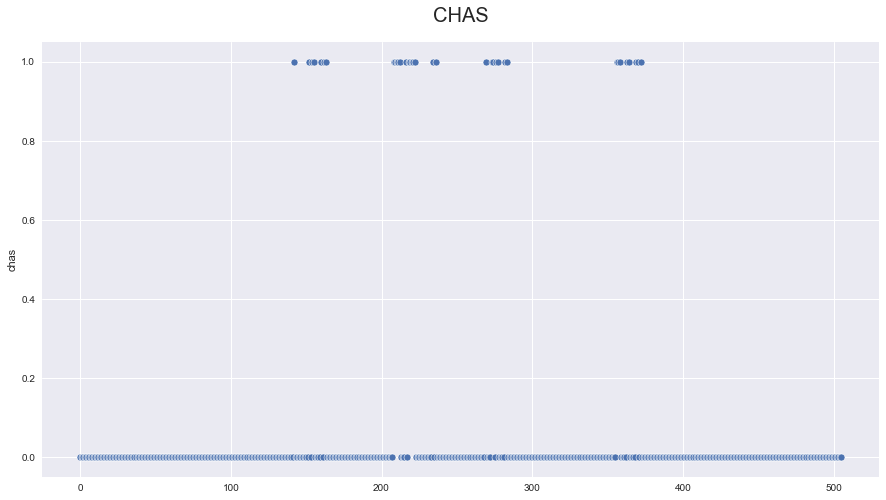

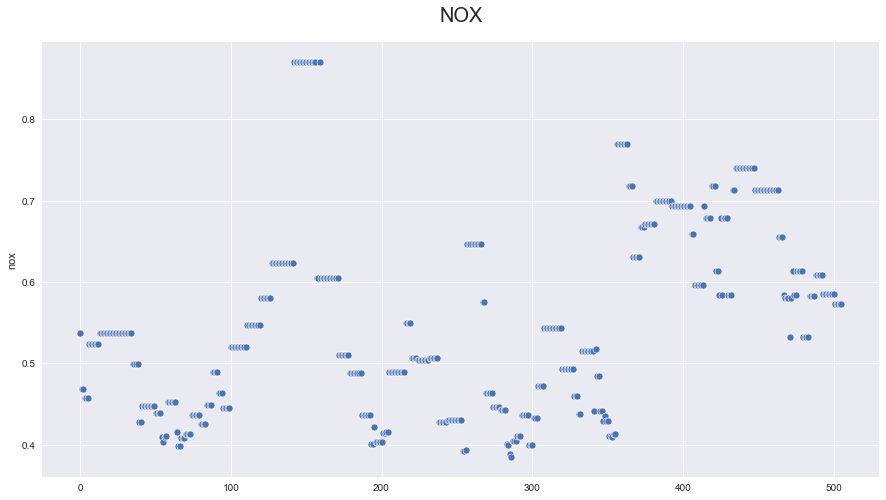

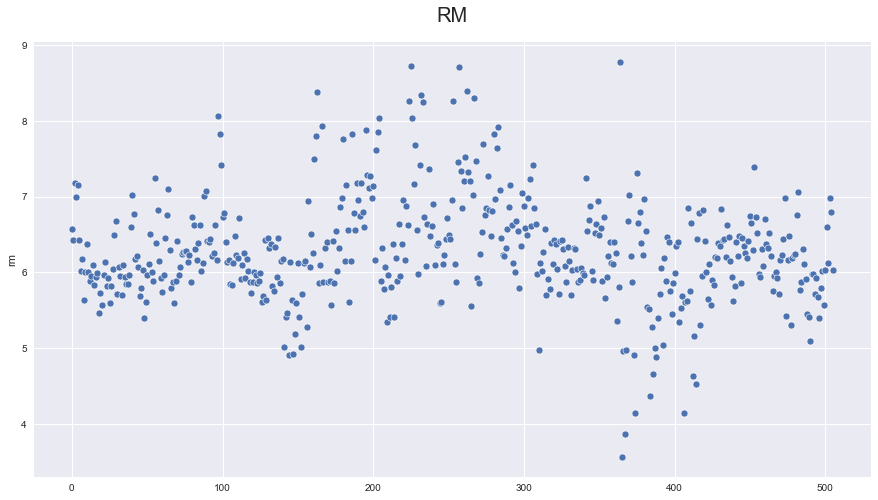

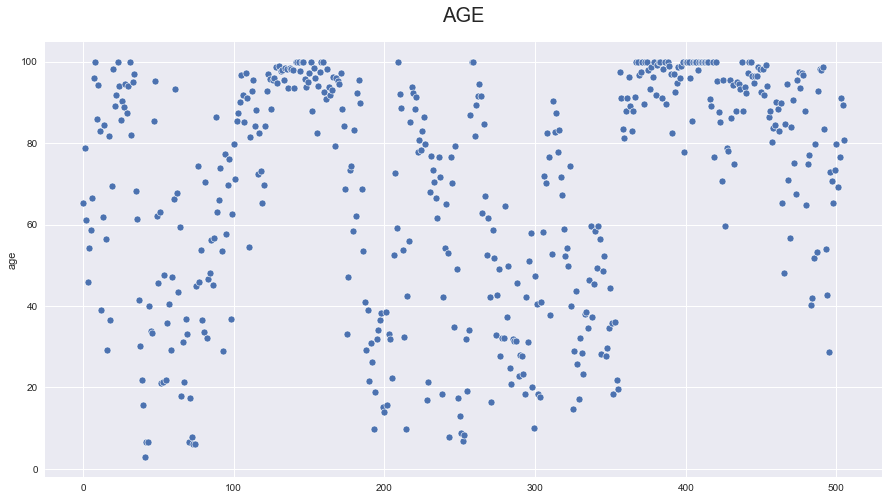

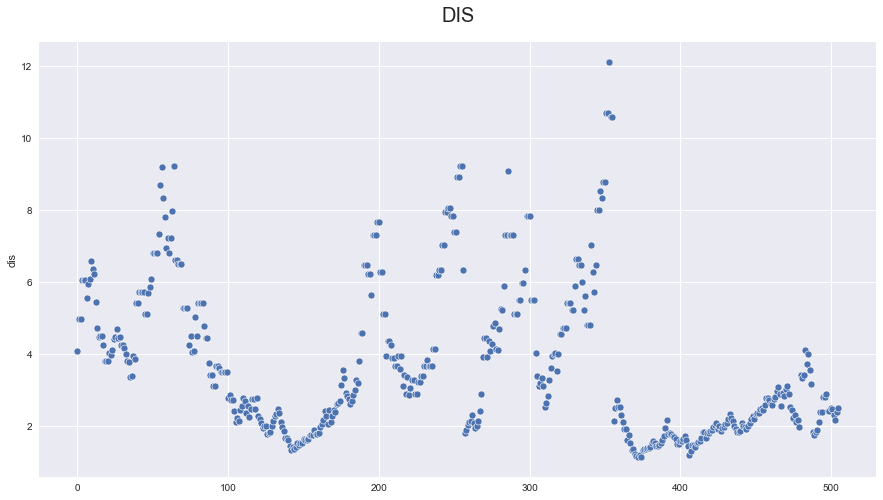

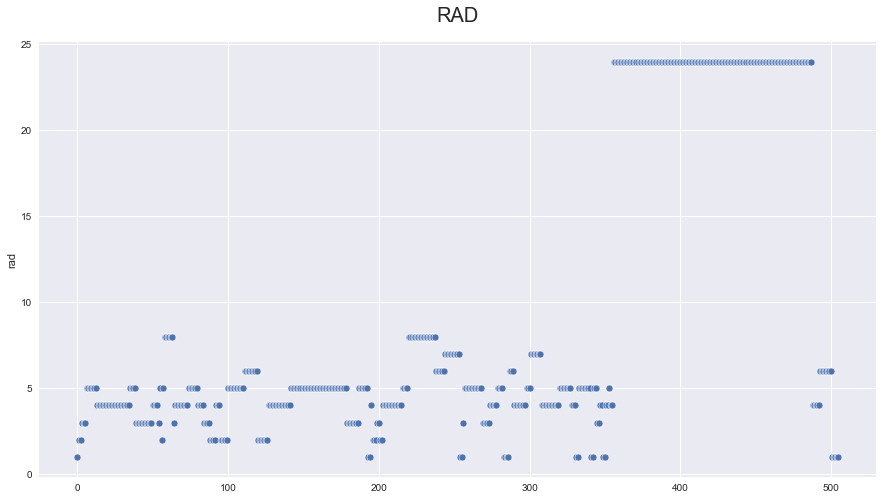

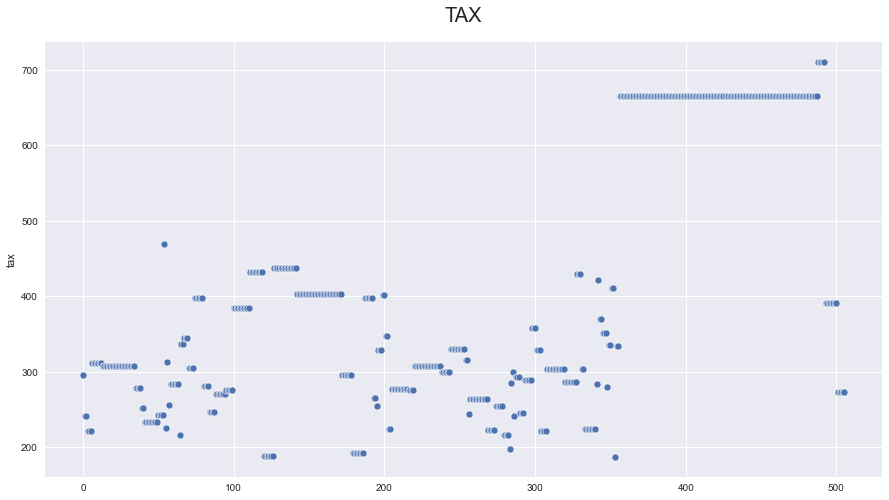

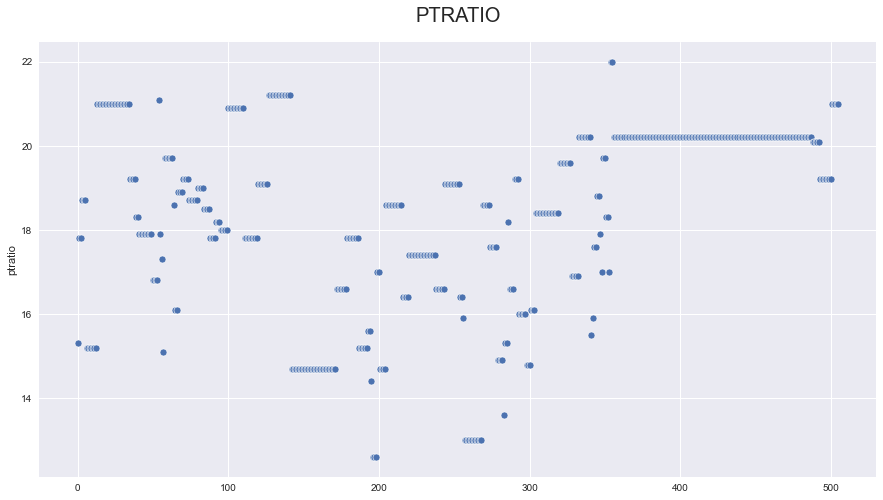

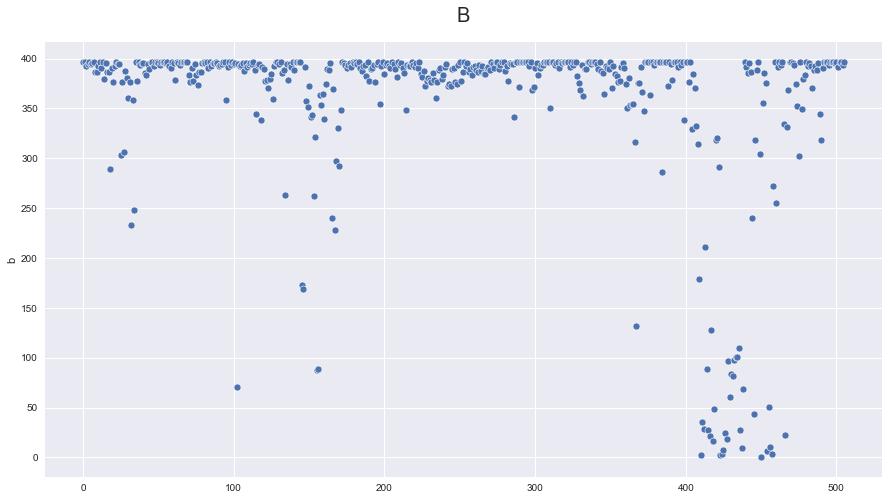

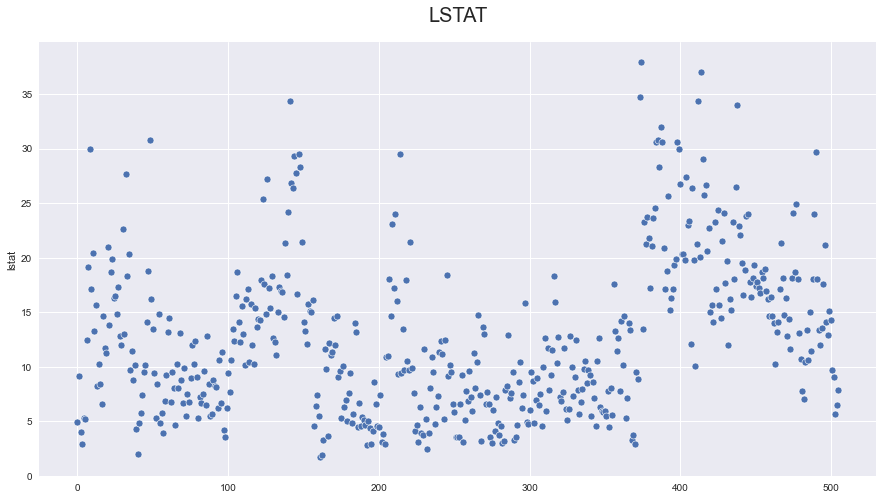

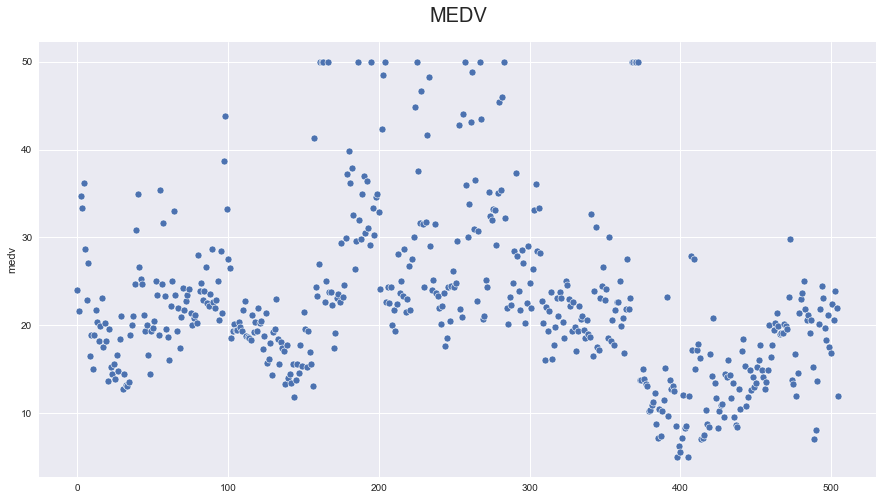

In [8]:
columns = df.columns
for col in columns:
    plt.figure(figsize=(15,8))
    sns.scatterplot(data=df[col])
    plt.title(col.upper(), fontsize=20, pad=20)
    plt.show()

### Multi Variate

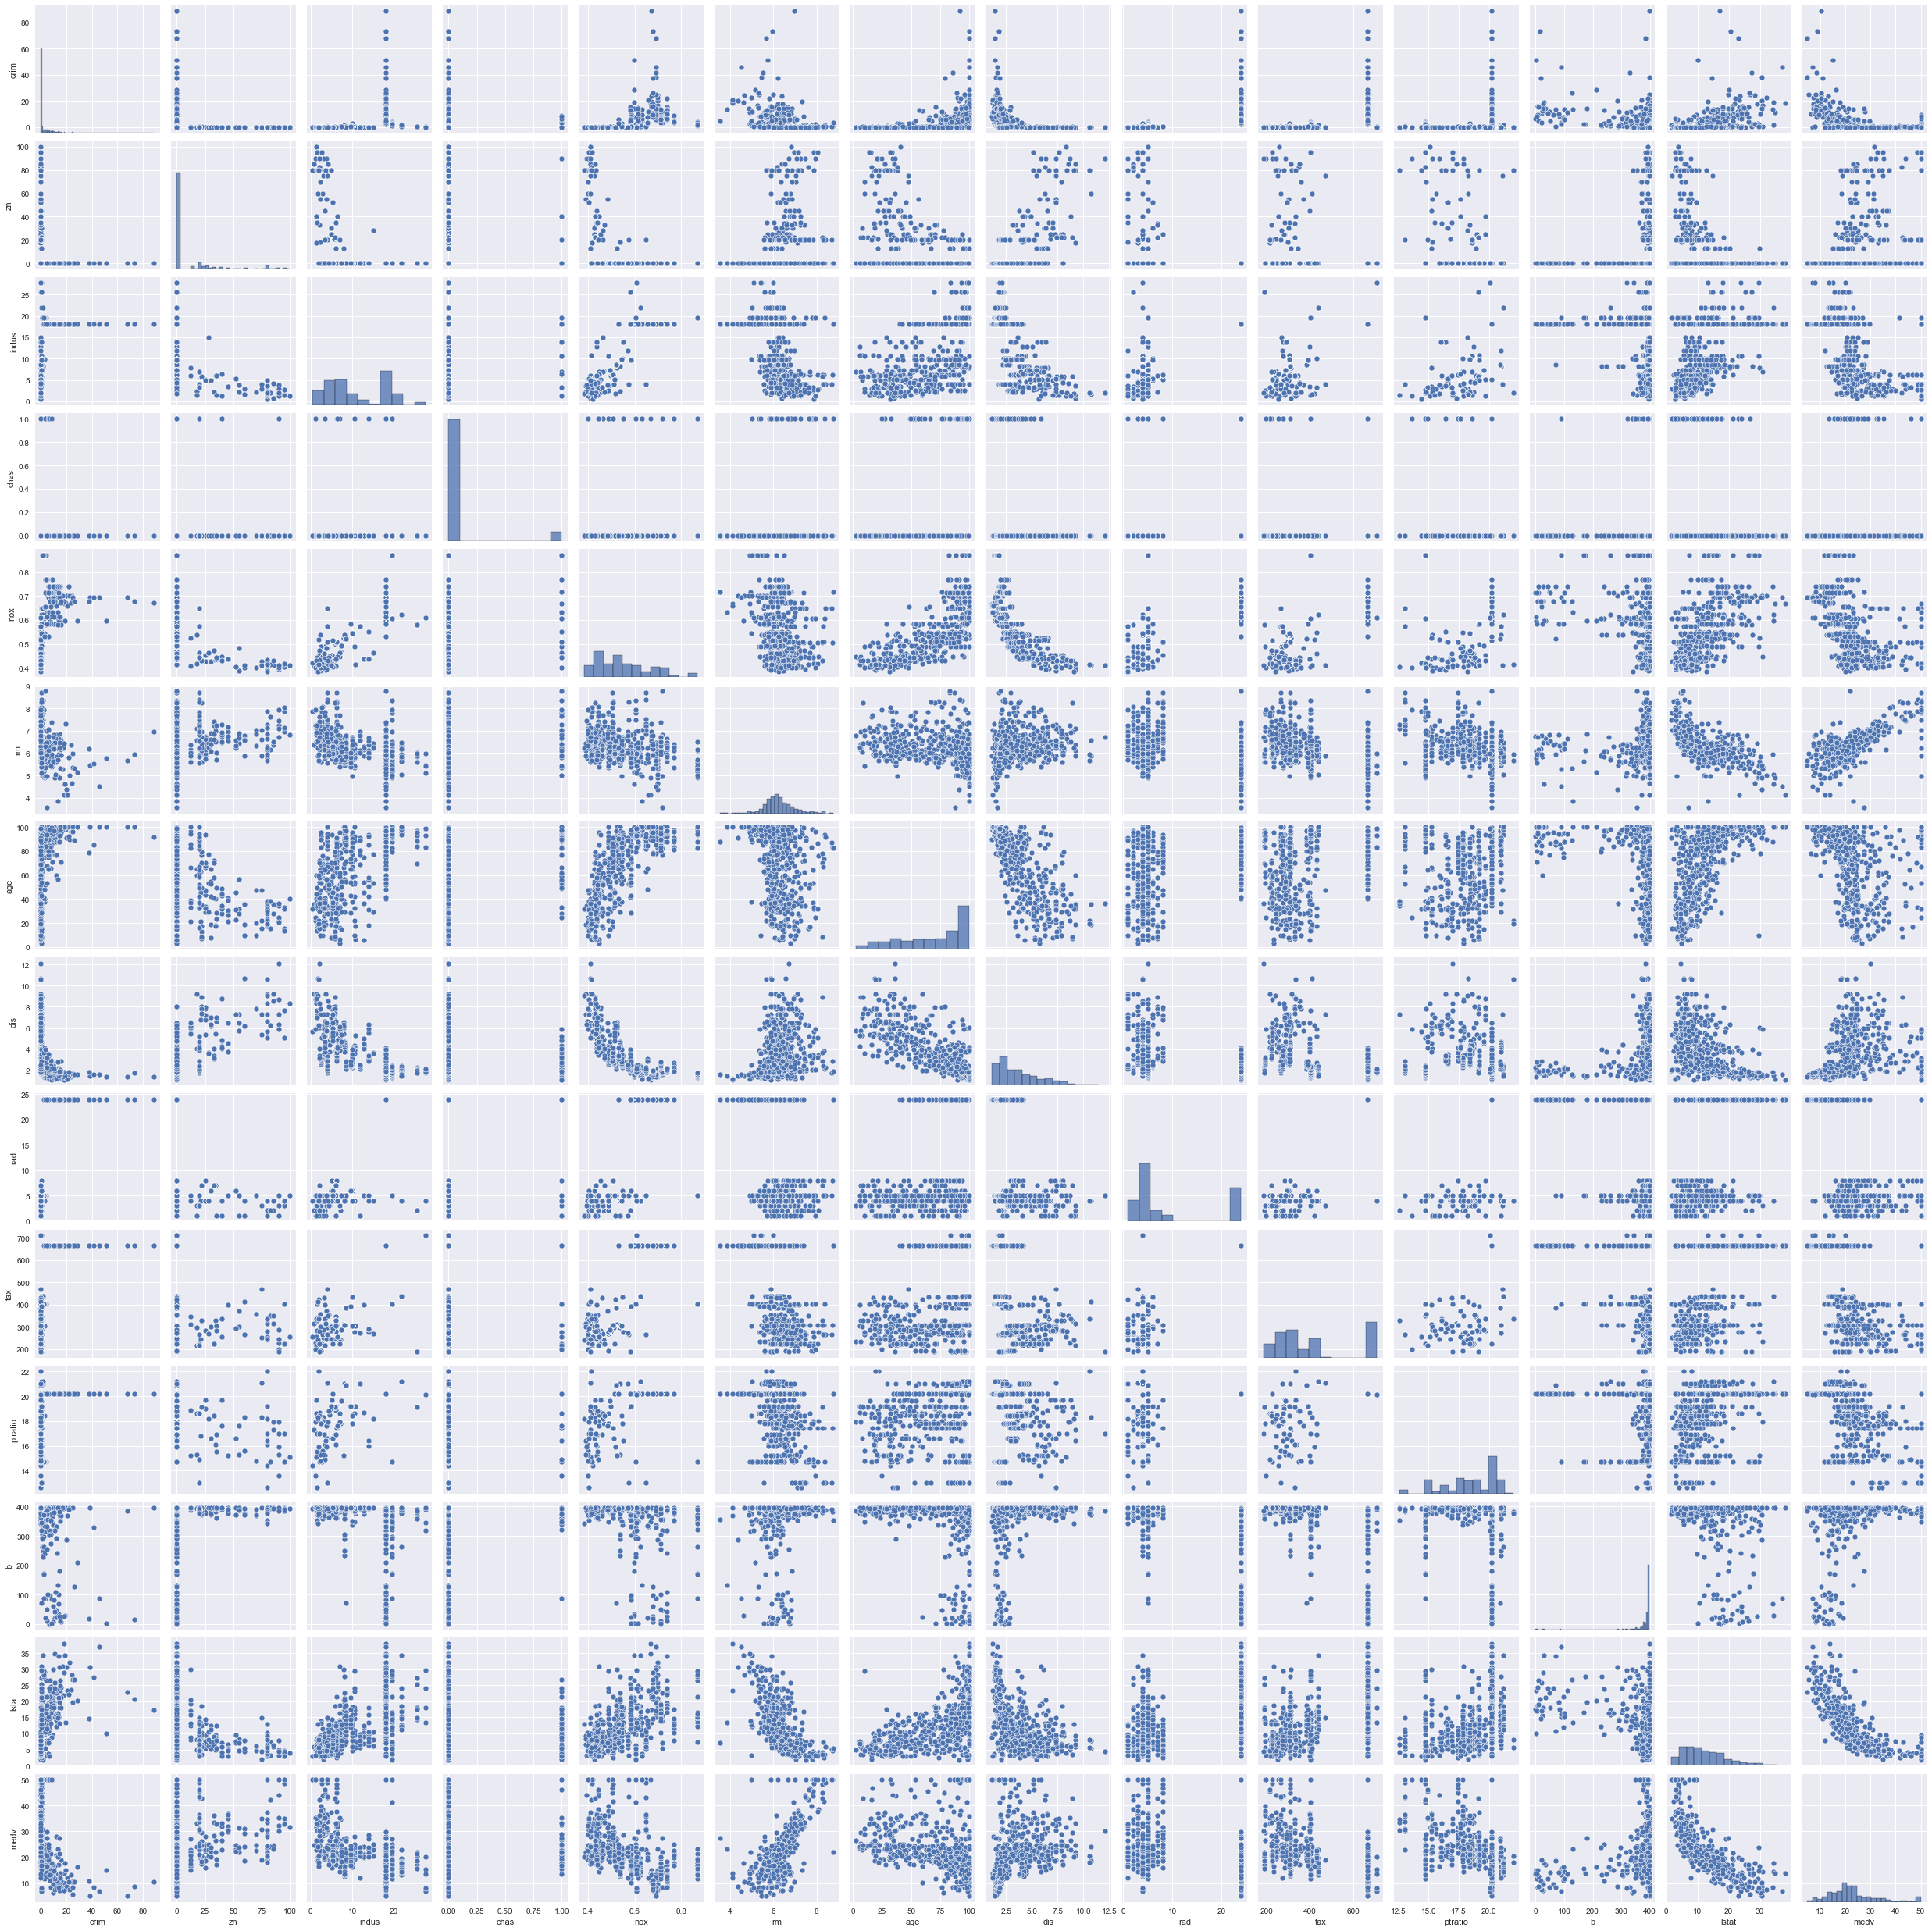

In [9]:
sns.pairplot(df)
plt.show()

## Check Outliers

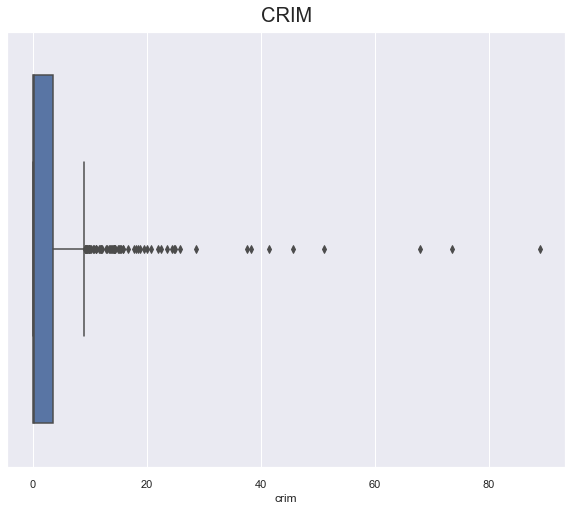

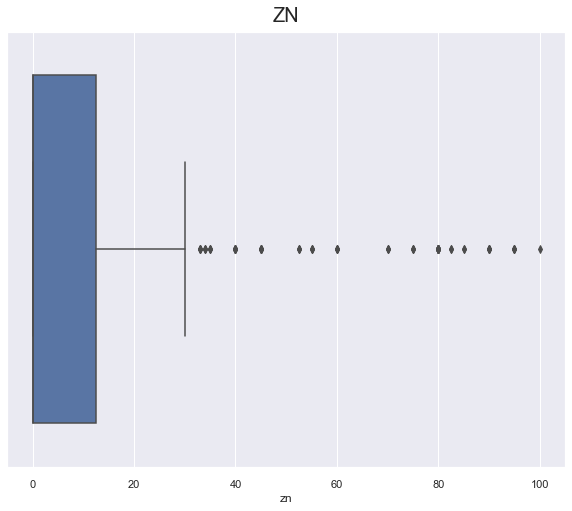

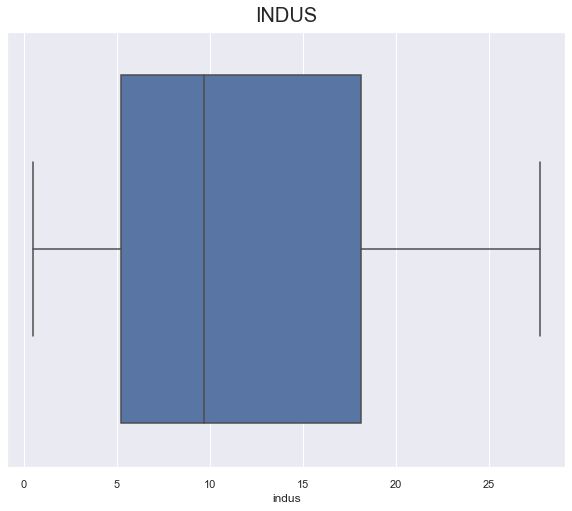

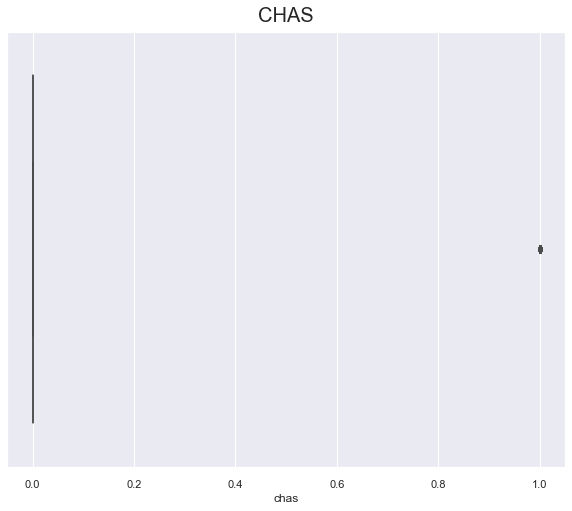

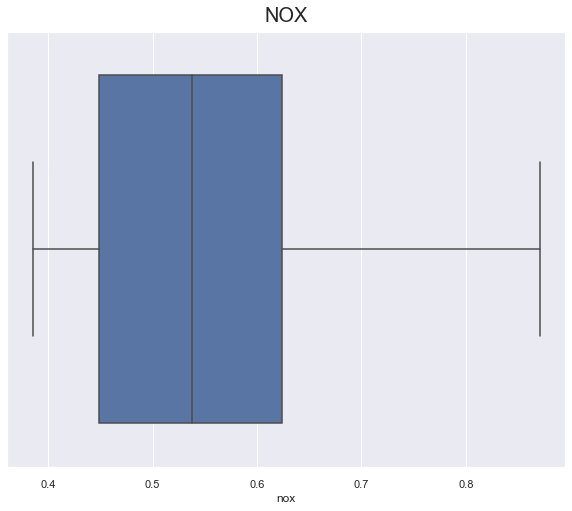

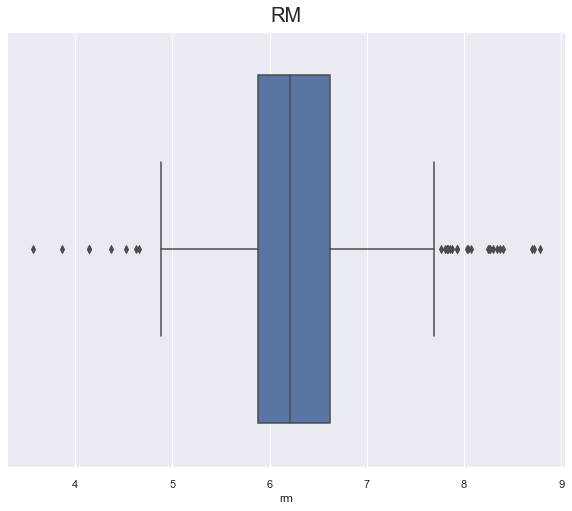

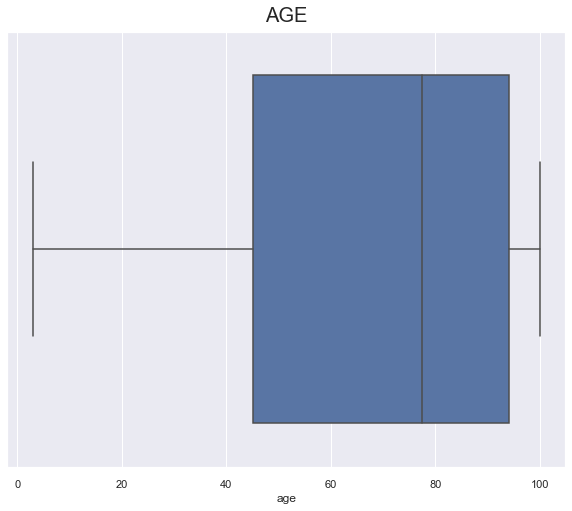

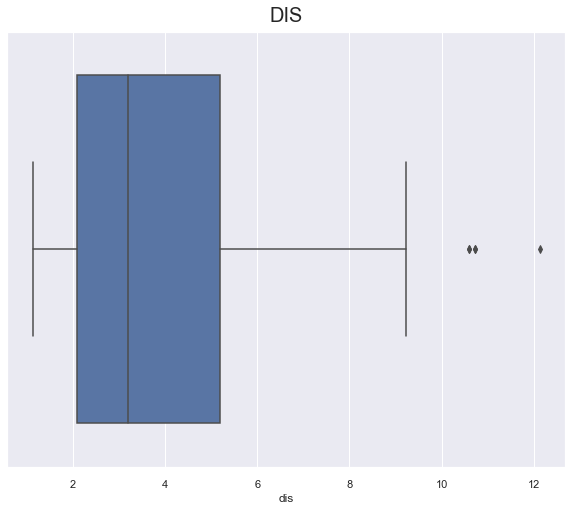

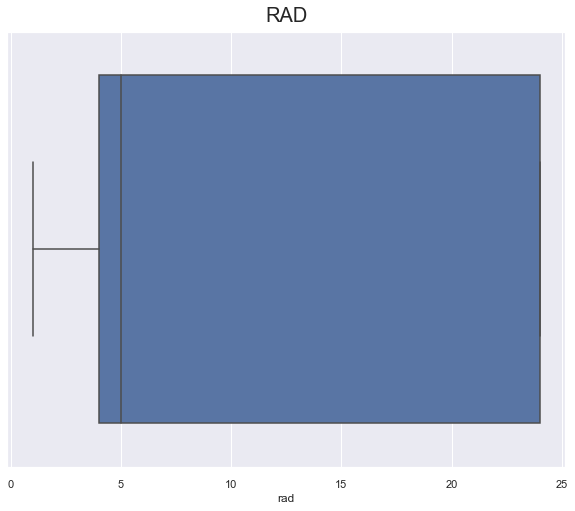

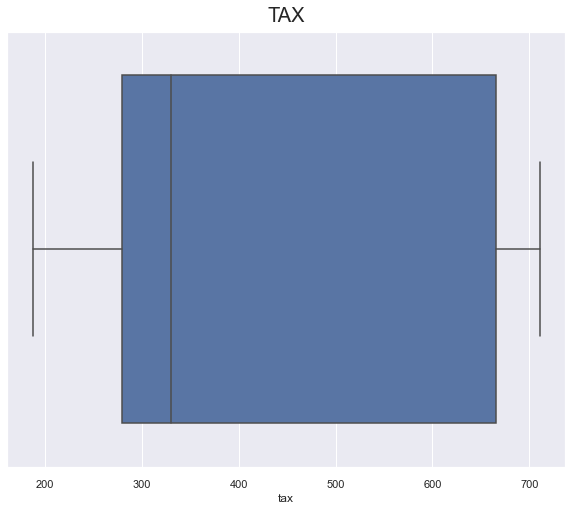

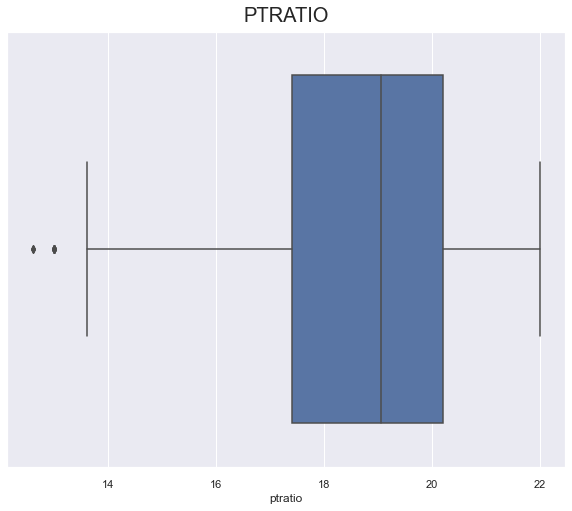

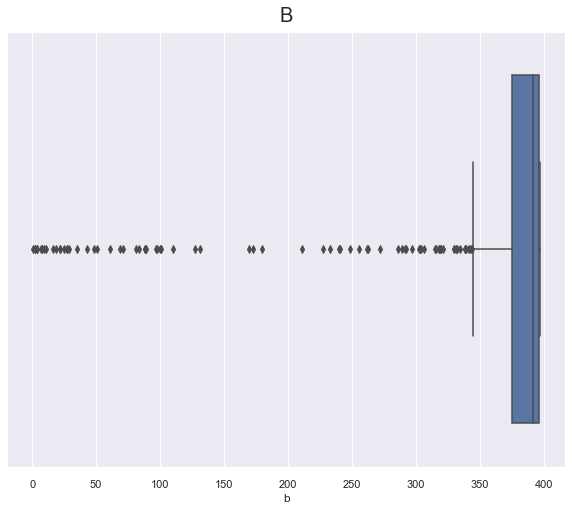

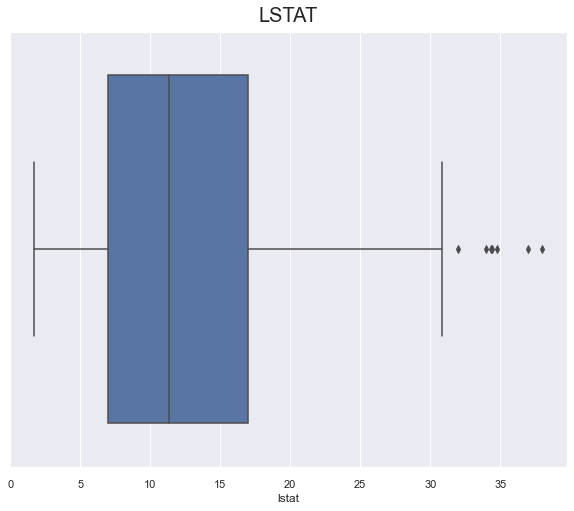

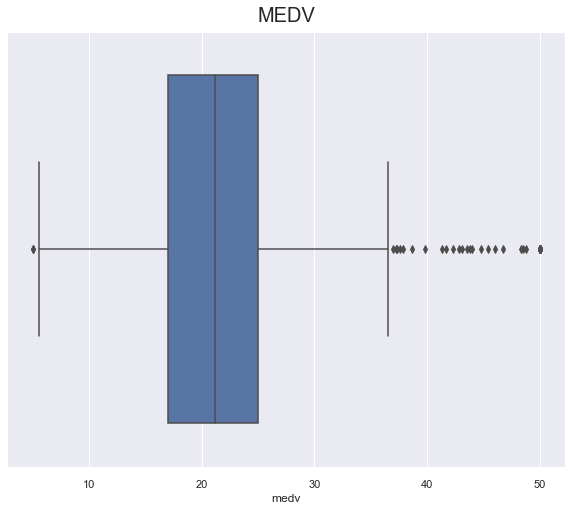

In [10]:
columns = df.columns

for column in columns:
    sns.set(rc={"figure.figsize":(10, 8)})
    sns.boxplot(x=df[column])
    plt.title(column.upper(), fontsize=20, pad=10)
    plt.show()

> Terdapat banyak data yang memiliki outliers

#### Delete Outliers with IQR Method

In [11]:
for column in df:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    fence_low  = q1 - 1.5*iqr
    fence_high = q3 + 1.5*iqr
    new_df = df.loc[(df[column] > fence_low) & (df[column] < fence_high)]
    
print(f'Before using IQR Method : {df.shape[0]}')
print(f'After using IQR Method : {new_df.shape[0]}')

Before using IQR Method : 506
After using IQR Method : 466


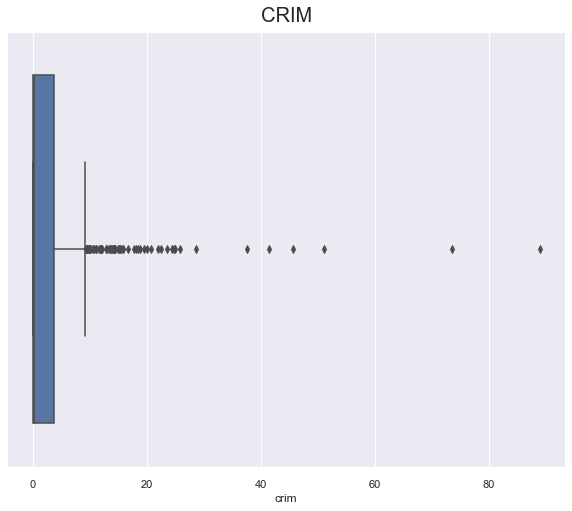

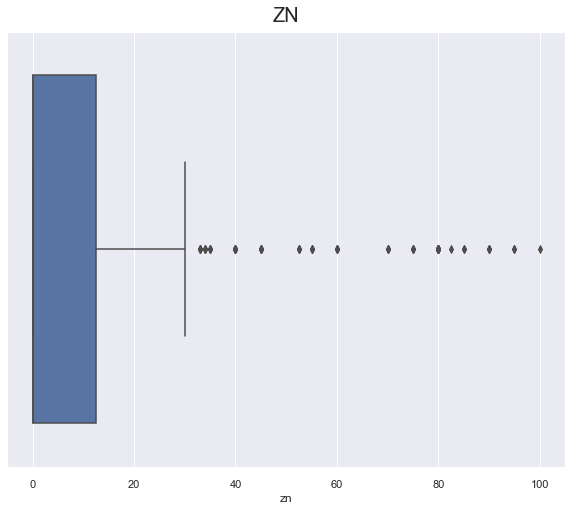

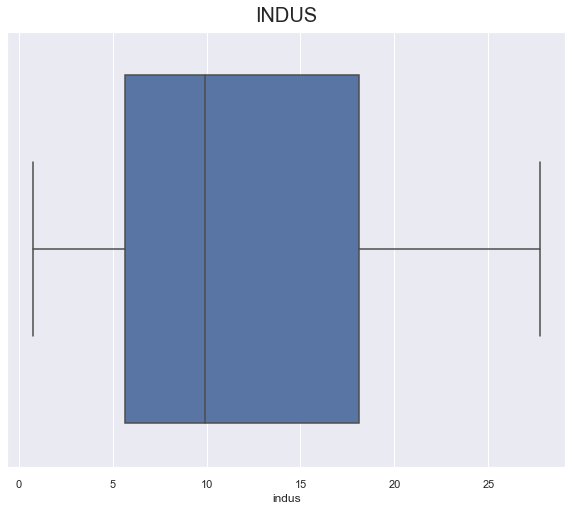

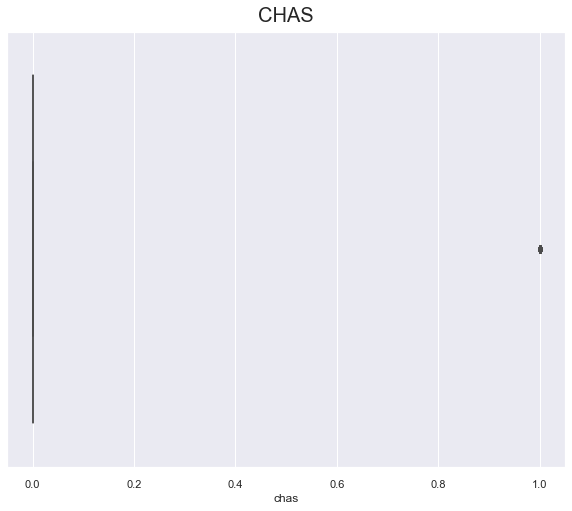

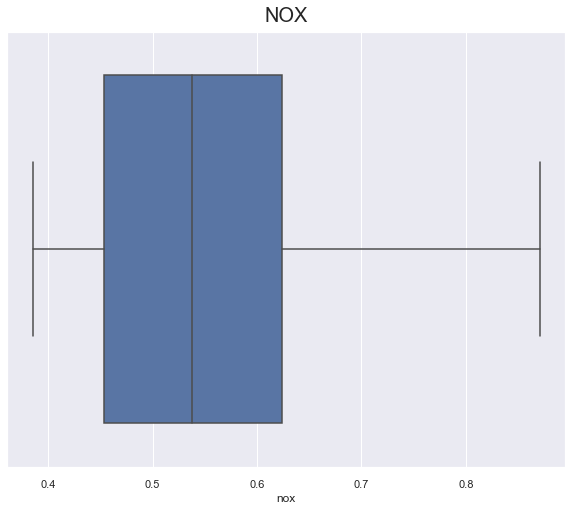

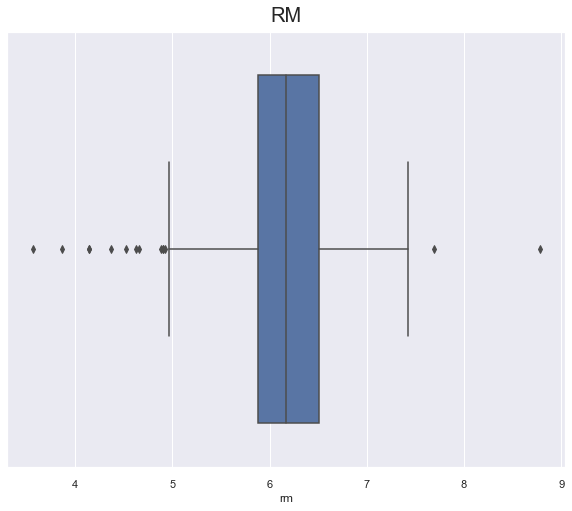

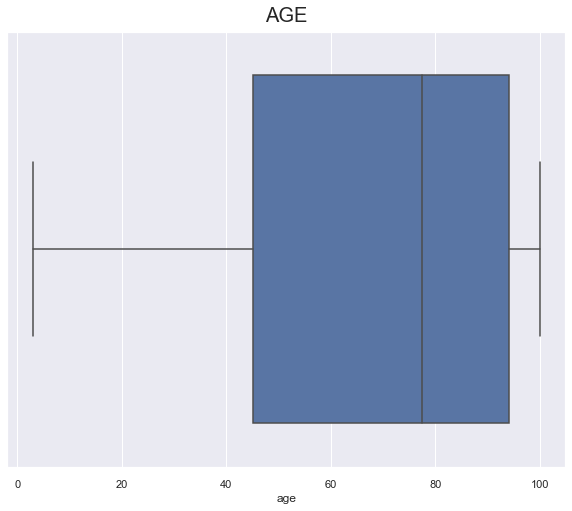

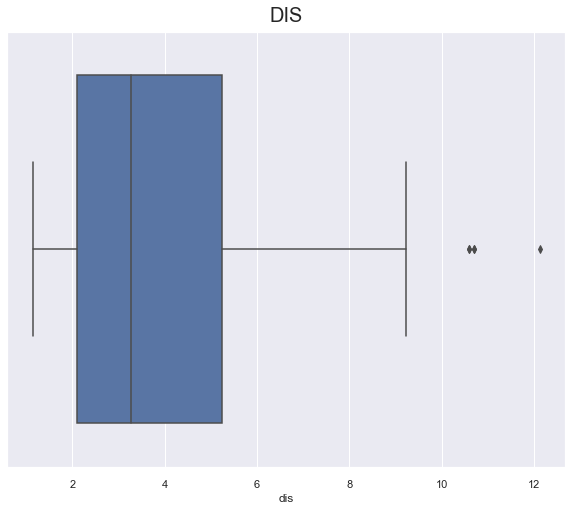

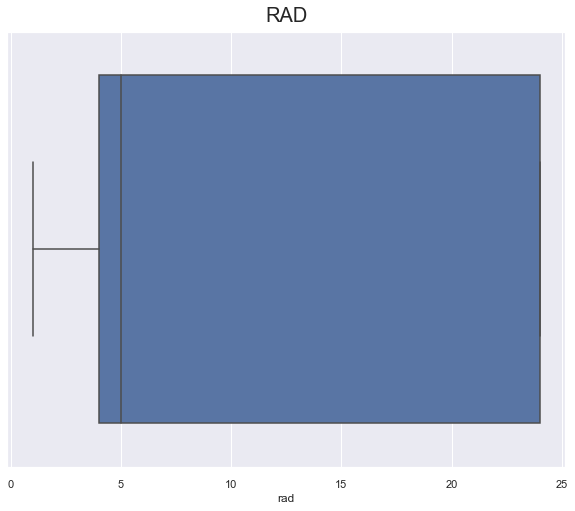

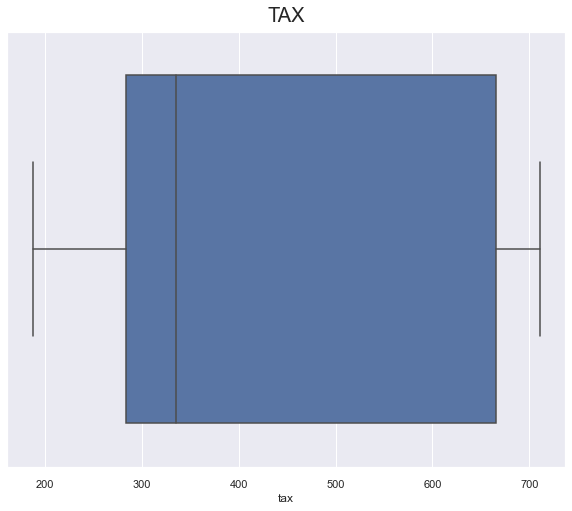

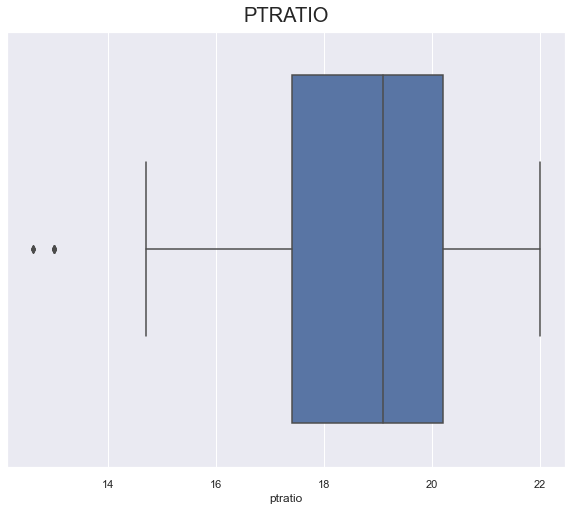

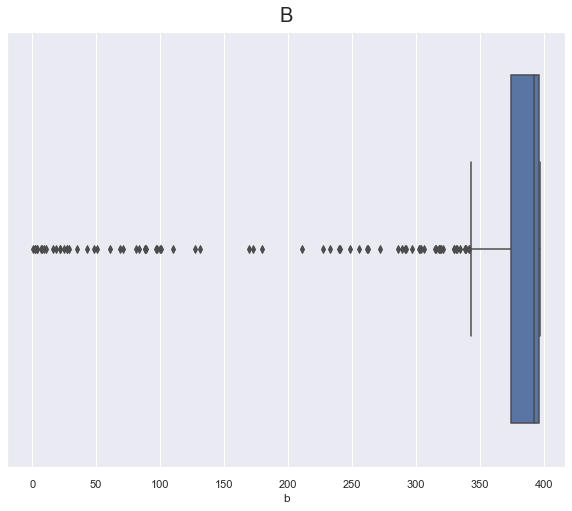

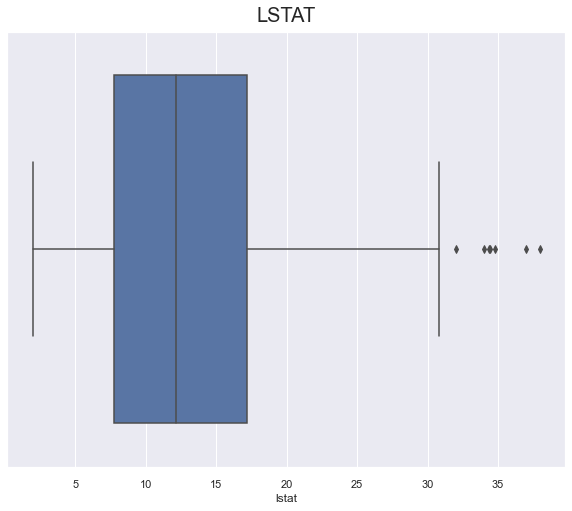

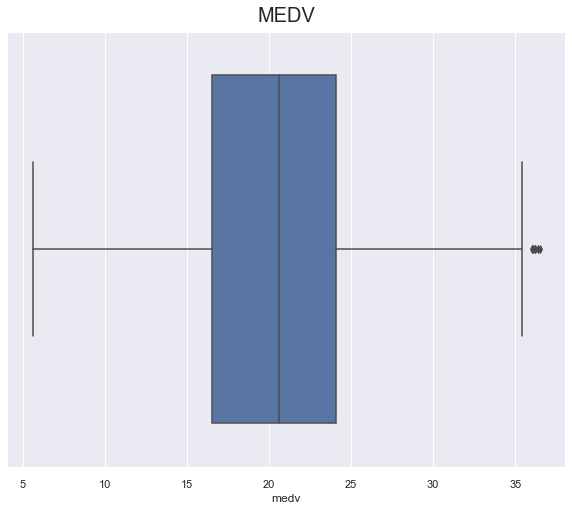

In [12]:
columns = new_df.columns

for column in columns:
    sns.set(rc={"figure.figsize":(10, 8)})
    sns.boxplot(x=new_df[column])
    plt.title(column.upper(), fontsize=20, pad=10)
    plt.show()

In [ ]:
# function Check Outliers
def data_outlier(df):
  for k, v in df.items():
    Q1        = v.quantile(0.25)
    Q3        = v.quantile(0.75)
    IQR       = Q3 - Q1
    v_range   = v[(v <= Q1 - 1.5 * IQR) | (v >= Q3 + 1.5 * IQR)]
    perc      = np.shape(v_range)[0] * 100.0 / df.shape[0]
    col_mean  = v.mean()
    col_medn  = v.median()     
    print(f'Column {k}, outliers = {perc:.2f} % , mean = {col_mean:.2f}, median = {col_medn:.2f}')

## Check Correlation

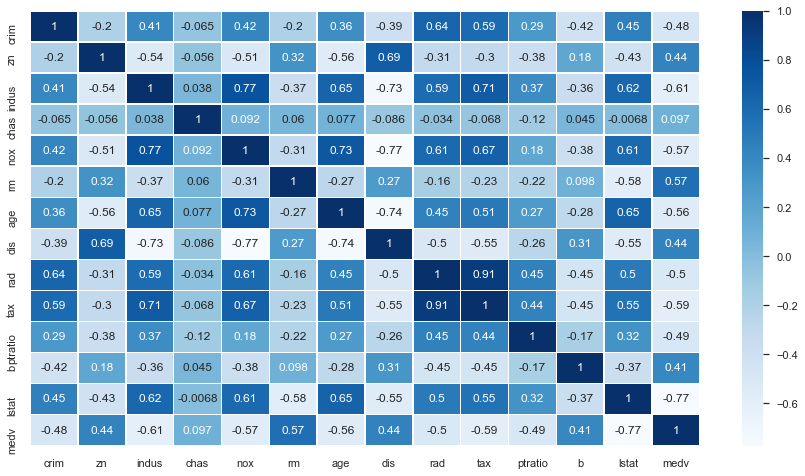

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(new_df.corr(), annot=True,linewidths=.5,cmap="Blues")
plt.show()

In [14]:
drop_col = ['crim','indus','nox','age','rad','tax','ptratio','lstat']
df_clear = new_df.drop(drop_col, axis=1)

In [15]:
df_clear

,zn,chas,rm,dis,b,medv
0,18.0,0,6.575,4.0900,396.90,24.0
1,0.0,0,6.421,4.9671,396.90,21.6
2,0.0,0,7.185,4.9671,392.83,34.7
3,0.0,0,6.998,6.0622,394.63,33.4
4,0.0,0,7.147,6.0622,396.90,36.2
...,...,...,...,...,...,...
501,0.0,0,6.593,2.4786,391.99,22.4
502,0.0,0,6.120,2.2875,396.90,20.6
503,0.0,0,6.976,2.1675,396.90,23.9
504,0.0,0,6.794,2.3889,393.45,22.0


### Split data

In [16]:
from sklearn.model_selection import train_test_split

# with drop - correlation
X = df_clear.drop('medv', axis=1)
y = df_clear['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.2)

# without drop
X2 = new_df.drop('medv', axis=1)
y2 = new_df['medv']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=42, test_size=.2)

### Standarization

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

## Modeling

### Linear Regression

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [21]:
lr2 = LinearRegression()
lr2.fit(X2_train, y2_train)

LinearRegression()

### Test Model

In [22]:
from sklearn.metrics import r2_score

accuracy_score = lr.score(X_train, y_train)
print(f'Accuracy Score data train 1: {accuracy_score * 100:.2f}')
accuracy_score = lr.score(X_test, y_test) 
print(f'Accuracy Score data test 1: {accuracy_score * 100:.2f}')


accuracy_score2 = lr2.score(X2_train, y2_train) 
print(f'Accuracy Score data train 2: {accuracy_score2 * 100:.2f}')

accuracy_score2 = lr2.score(X2_test, y2_test) 
print(f'Accuracy Score data test 2: {accuracy_score2 * 100:.2f}')

Accuracy Score data train 1: 52.82
Accuracy Score data test 1: 41.90
Accuracy Score data train 2: 76.07
Accuracy Score data test 2: 75.25


In [23]:
medv_predict = lr.predict(X_test)
medv_predict

array([32.38656116, 26.89229504, 17.73382185, 22.54357001, 20.93359369,
        5.33456158, 25.0706512 , 21.59256308, 20.3016717 , 24.44327236,
       20.73791078, 21.62829833, 15.1835068 , 23.35260922, 22.96331649,
       29.64258444, 15.65029154, 22.64354856, 22.29322573, 21.20640436,
       23.95707507, 22.2249343 , 21.65526943, 20.79005068, 21.62170883,
       21.18110951, 26.78563184, 25.94405673, 18.01770091, 26.13508175,
       14.67469531, 15.37211154, 25.25975558, 21.877535  , 15.10261888,
       26.87702412, 19.67604806, 22.6681192 , 18.37725751, 15.57002796,
       20.2687027 , 18.07252358, 15.57312079, 18.10189336, 12.02172347,
       17.64159383, 21.19946118, 19.63632648, 21.65194053, 32.29685032,
       17.88431405, 28.02277935, 21.48707412, 27.87957917, 21.79643942,
       23.81325721, 21.61694974, 20.94109994, 14.95501406, 18.99868705,
       22.55749738, 22.1858657 , 18.56852108, 12.24045153, 21.0256746 ,
       29.15224627, 17.2141247 , 16.39545414, 22.41421641, 15.82

In [24]:
medv_predict2 = lr2.predict(X2_test)
medv_predict2

array([29.22649305, 22.61677   , 15.95717457, 22.17226214, 24.62601074,
       14.33271201, 24.33758226, 19.94496321, 26.51607861, 24.8748434 ,
       22.75992846, 24.34416676, 10.47712599, 25.42179667, 23.38405261,
       30.06106408, 14.70047642, 23.86141474, 19.27550259, 21.7974695 ,
       27.64668447, 27.0690393 , 21.66204486, 17.00339418, 23.08619429,
       20.86456112, 25.79362092, 30.30232866, 14.26275768, 26.93636628,
       13.46148604, 16.91643853, 27.36543969, 25.63750822, 18.31632228,
       29.3168732 , 22.3809334 , 25.05056863, 15.60241735, 15.71148634,
       19.76979163, 20.88696808, 13.74048582, 20.05188332, 12.65307077,
       27.13193316, 20.66047413, 20.19345998, 16.38343774, 29.90312363,
       20.90429982, 21.3400036 , 17.5572487 , 26.87874387, 16.45298808,
       18.45792931, 21.21696562, 20.01861618, 12.06015887, 19.46497814,
       28.68877431, 24.00957654, 19.54051542, 13.87934207, 23.99067839,
       30.03101177, 13.57816209, 16.13049075, 16.36748178, 14.82

#### Mean Absolute Error

In [25]:
from sklearn.metrics import mean_absolute_error

print(f'MAE model 1 :{mean_absolute_error(y_test,medv_predict)}')
print(f'MAE model 2 :{mean_absolute_error(y2_test,medv_predict2)}')

MAE model 1 :3.377192929172509
MAE model 2 :2.230956448276867


#### Mean Squared Error

In [26]:
from sklearn.metrics import mean_squared_error
print(f'MSE model 1 :{mean_squared_error(y_test, medv_predict)}')
print(f'MSE model 2 :{mean_squared_error(y2_test, medv_predict2)}')

MSE model 1 :23.306335148799747
MSE model 2 :9.929286962391725


#### Root Mean Squared Error

In [27]:
print(f'RMSE model 1 :{np.sqrt(mean_squared_error(y_test, medv_predict))}')
print(f'RMSE model 2 :{np.sqrt(mean_squared_error(y2_test, medv_predict2))}')

RMSE model 1 :4.827663528954742
RMSE model 2 :3.151077111463908
